In [1]:
using Plots

In [2]:
using Glob

In [3]:
using Statistics

In [4]:
const regex = r"^([0-9\.]+) seconds"

r"^([0-9\.]+) seconds"

In [5]:
function get_time(line)
    m = match(regex, line)
    if m !== nothing
        number = parse(Float64, m.captures[1])
        return number
    else
        return nothing
    end
end

get_time (generic function with 1 method)

In [6]:
function get_timing_data(path)
    times = Float64[]
    for line in readlines(path)
        t = get_time(line)
        if !isnothing(t)
            push!(times, t)
        end
    end
    return times
end

get_timing_data (generic function with 1 method)

In [7]:
timing_data_short = Vector{Vector{Float64}}()
for i in 1:5
    path = glob(joinpath("short", "run00$(i)", "gs-*.out")) |> only
    println("Reading: $(path)")
    push!(timing_data_short, get_timing_data(path))
end

Reading: short/run001/gs-julia-1MPI-1GPU-32626175.out
Reading: short/run002/gs-julia-1MPI-1GPU-32626177.out
Reading: short/run003/gs-julia-1MPI-1GPU-32626179.out
Reading: short/run004/gs-julia-1MPI-1GPU-32626182.out
Reading: short/run005/gs-julia-1MPI-1GPU-32626203.out


In [8]:
job_sizes_short = [2^(i+1) for i in 1:5]

5-element Vector{Int64}:
  4
  8
 16
 32
 64

In [9]:
mean_times_short = [mean(x) for x in timing_data_short]

5-element Vector{Float64}:
 521.83742175
 300.683146875
 199.74492656249998
 193.10105981481482
 231.41792404651164

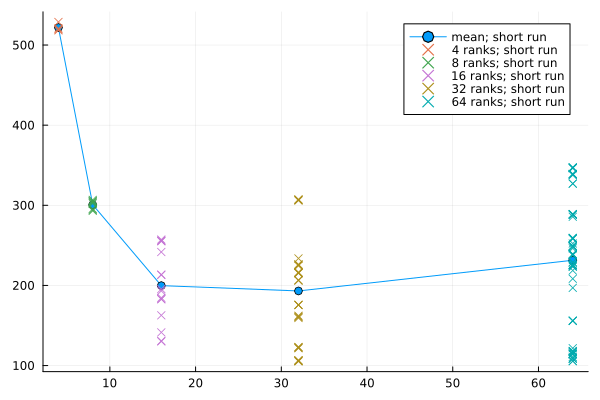

In [10]:
plot(job_sizes_short, mean_times_short, m=:o, label="mean; short run")
for i in 1:5
    scatter!(
        job_sizes_short[i]*ones(job_sizes_short[i]), timing_data_short[i], m=:x,
        label="$(job_sizes_short[i]) ranks; short run"
    ) 
end
plot!()

In [11]:
timing_data_long = Vector{Vector{Float64}}()
for i in 1:4
    path = glob(joinpath("long", "run00$(i)", "gs-*.out")) |> only
    println("Reading: $(path)")
    push!(timing_data_long, get_timing_data(path))
end

Reading: long/run001/gs-julia-1MPI-1GPU-32622901.out
Reading: long/run002/gs-julia-1MPI-1GPU-32622922.out
Reading: long/run003/gs-julia-1MPI-1GPU-32622928.out
Reading: long/run004/gs-julia-1MPI-1GPU-32623935.out


In [12]:
valid = map(x->length(x)>0, timing_data_long)

4-element Vector{Bool}:
 0
 0
 1
 1

In [13]:
job_sizes_long = [2^(i+1) for i in 1:4][valid]

2-element Vector{Int64}:
 16
 32

In [14]:
mean_times_long = [mean(x) for x in timing_data_long][valid]

2-element Vector{Float64}:
 913.0946699374999
 472.8566798125

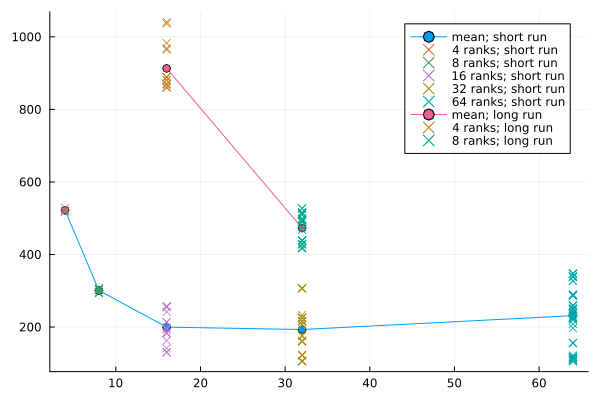

In [15]:
plot!(job_sizes_long, mean_times_long, m=:o, label="mean; long run")
for i in 1:2
    scatter!(
        job_sizes_long[i]*ones(job_sizes_long[i]), timing_data_long[valid][i], m=:x,
        label="$(job_sizes_short[i]) ranks; long run"
    ) 
end
plot!()